## O que é Análise Exploratória?

Em resumo, análise exploratória (como o nome pode indicar) é a parte que vamos explorar os dados para desvendar alguns fatos sobre eles, que vão nos ajudar a decidir como vamos usar o dataset para o passo de treinamento de um modelo de ML ou IA. Em suma, vamos fazer o seguinte:

- Encontrar anomalias
- Encontrar correlações

Isso é, ao final da exploração, vamos ter decidido duas coisas:

- Iremos tratar os casos A, B e C porque eles estão dissonantes com o resto dos dados ou do nosso escopo
- Nós vamos usar os atributos X, Y e Z porque eles tem relação entre si e respondem a nossa hipótese de modelo


## Sobre o dataset

O dataset do titanic é um clássico para iniciantes em machine learning, e apesar de ser um dataset pequeno, é muito didático. Isso porque ele possui tudo que um iniciante precisa entender: variáveis numéricas e catagóricas; valores faltantes, outliers, atributos de correlação diversas, etc. 

Ele é formado pelos seguintes dados:

- survived:	Se o passageiro sobreviveu	(0 = No, 1 = Yes)
- passengerID: Identificação do passagem (Index criado *a posteriori*)
- pclass: Classe do passageiro	(1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Gênero do passageiro	
- age: Idade em anos	
- sibsp: Número de irmãos / conjuges abordo	
- parch: Número de parentes / crianças	
- ticket: Número do ticket	
- fare:	Preço da passagem (tarifa)
- cabin: Número da cabine	
- embarked: Porto em que embracou (C = Cherbourg, Q = Queenstown, S = Southampton)

E o nosso objetivo com relação à esse dataset é predizer o atributo ***survived***, ou seja, vamos tentar saber se dado as informações de uma pessoa, ela teria sobrevivido ou não ao naufrágio do titanic. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/hype-usp/PS-2023_1/main/Case/Avancado/data/train.csv")

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Há um número imenso de valores faltantes na coluna de cabine, grandes demais para serem substituidos, além de ser um coluna com 
pouco significado para o case, então será descartada (ele poderia ter mais relevância se viesse junto com alguma outra 
coluna dando alguma referência quanto a localização da cabine no navio)

- Há uma quantidade considerável de idades faltando, mas podemos preencher usando medianas levando em conta outros atributos

In [65]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Não há numeros errados no campo de survived (0,1)
- Não aparentam ter idades fora de um range crível
- "Fare" aparenta ter alguns outliers que valem a pena dar uma checada, uma vez que tem um pulo 
muito grande do terceiro quartil para o valor máximo 

In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Usando o método `.corr()` do dataframe (e algumas transformações) nós podemos tirar algumas correlações interessantes dos dados:

- O número de parentes e de irmãos/conjuges é bem relacionado (hipótese: pessoas que levavam companhias eram mais suscetíveis a levar a família como um todo)
- A quantidade de sobreviventes e o preço da tarifa tem uma relação (hipótese: pessoas que pagaram mais são de classes mais altas, e que tinham mais prioridade)
- O número de parentes e da tarifa paga tem uma relação (hipótese: pessoas mais endinheiradas que tinham condições de levar seus parentes juntos em uma viagem desse tipo)


Exercício: Quais outras correlações vocês conseguem enxergar?

In [67]:
corrs = df[["Survived", "Pclass", "Age", "SibSp","Parch","Fare"]].corr().unstack() # Transforma as correlações em uma serie
corrs[corrs > 0].sort_values(kind="quicksort") # Pega apenas as correlações positivas

Pclass    Parch       0.018443
Parch     Pclass      0.018443
Survived  Parch       0.081629
Parch     Survived    0.081629
Pclass    SibSp       0.083081
SibSp     Pclass      0.083081
Fare      Age         0.096067
Age       Fare        0.096067
Fare      SibSp       0.159651
SibSp     Fare        0.159651
Fare      Parch       0.216225
Parch     Fare        0.216225
Survived  Fare        0.257307
Fare      Survived    0.257307
SibSp     Parch       0.414838
Parch     SibSp       0.414838
Survived  Survived    1.000000
SibSp     SibSp       1.000000
Age       Age         1.000000
Pclass    Pclass      1.000000
Parch     Parch       1.000000
Fare      Fare        1.000000
dtype: float64

In [68]:
corrs

Survived  Survived    1.000000
          Pclass     -0.338481
          Age        -0.077221
          SibSp      -0.035322
          Parch       0.081629
          Fare        0.257307
Pclass    Survived   -0.338481
          Pclass      1.000000
          Age        -0.369226
          SibSp       0.083081
          Parch       0.018443
          Fare       -0.549500
Age       Survived   -0.077221
          Pclass     -0.369226
          Age         1.000000
          SibSp      -0.308247
          Parch      -0.189119
          Fare        0.096067
SibSp     Survived   -0.035322
          Pclass      0.083081
          Age        -0.308247
          SibSp       1.000000
          Parch       0.414838
          Fare        0.159651
Parch     Survived    0.081629
          Pclass      0.018443
          Age        -0.189119
          SibSp       0.414838
          Parch       1.000000
          Fare        0.216225
Fare      Survived    0.257307
          Pclass     -0.549500
        

In [69]:
df[["Survived", "Pclass", "Age", "SibSp","Parch","Fare"]].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


E para as correlações negativas, temos algumas interessantes também, como:

- Quanto menor a classe (classes maiores tem um número menor. Ex: classe 1 ser a mais luxuosa), mais barato eram as tarifas (isso é óbvio, por isso a correlação tão grande)
- Quem tinha mais irmãos/conjuges, sobrevivia menos (hipótese: as pessoas davam mais preferência a crianças e mulheres)

Exercício Parte 2: Descubra uma hipóteses para as correlações negativas também.

In [70]:
corrs[corrs < 0].sort_values(kind="quicksort") # Pega apenas as correlações negativas

# 1 -> Mais luxuosa -> Aumentar o valor

Pclass    Fare       -0.549500
Fare      Pclass     -0.549500
Pclass    Age        -0.369226
Age       Pclass     -0.369226
Survived  Pclass     -0.338481
Pclass    Survived   -0.338481
Age       SibSp      -0.308247
SibSp     Age        -0.308247
Age       Parch      -0.189119
Parch     Age        -0.189119
Survived  Age        -0.077221
Age       Survived   -0.077221
Survived  SibSp      -0.035322
SibSp     Survived   -0.035322
dtype: float64

## Análise Visual

Para entendermos os nossos dados, precisamos ter uma visão ampla deles, e nada melhor do que criar gráficos para entendermos como os nossos dados se comportam.

Alguns plots mais usados são:

- Gráfico de Dispersão (Scatter Plot)
- Histograma
- Gráfico de Contagem (Count Plot)
- Mapa de Calor (Heat Map)
- Plot Temporal

Podemos ter uma panorama geral dos nossos dados criando um histograma geral dos nossos dados para entender a distribuição e formato do dataset!

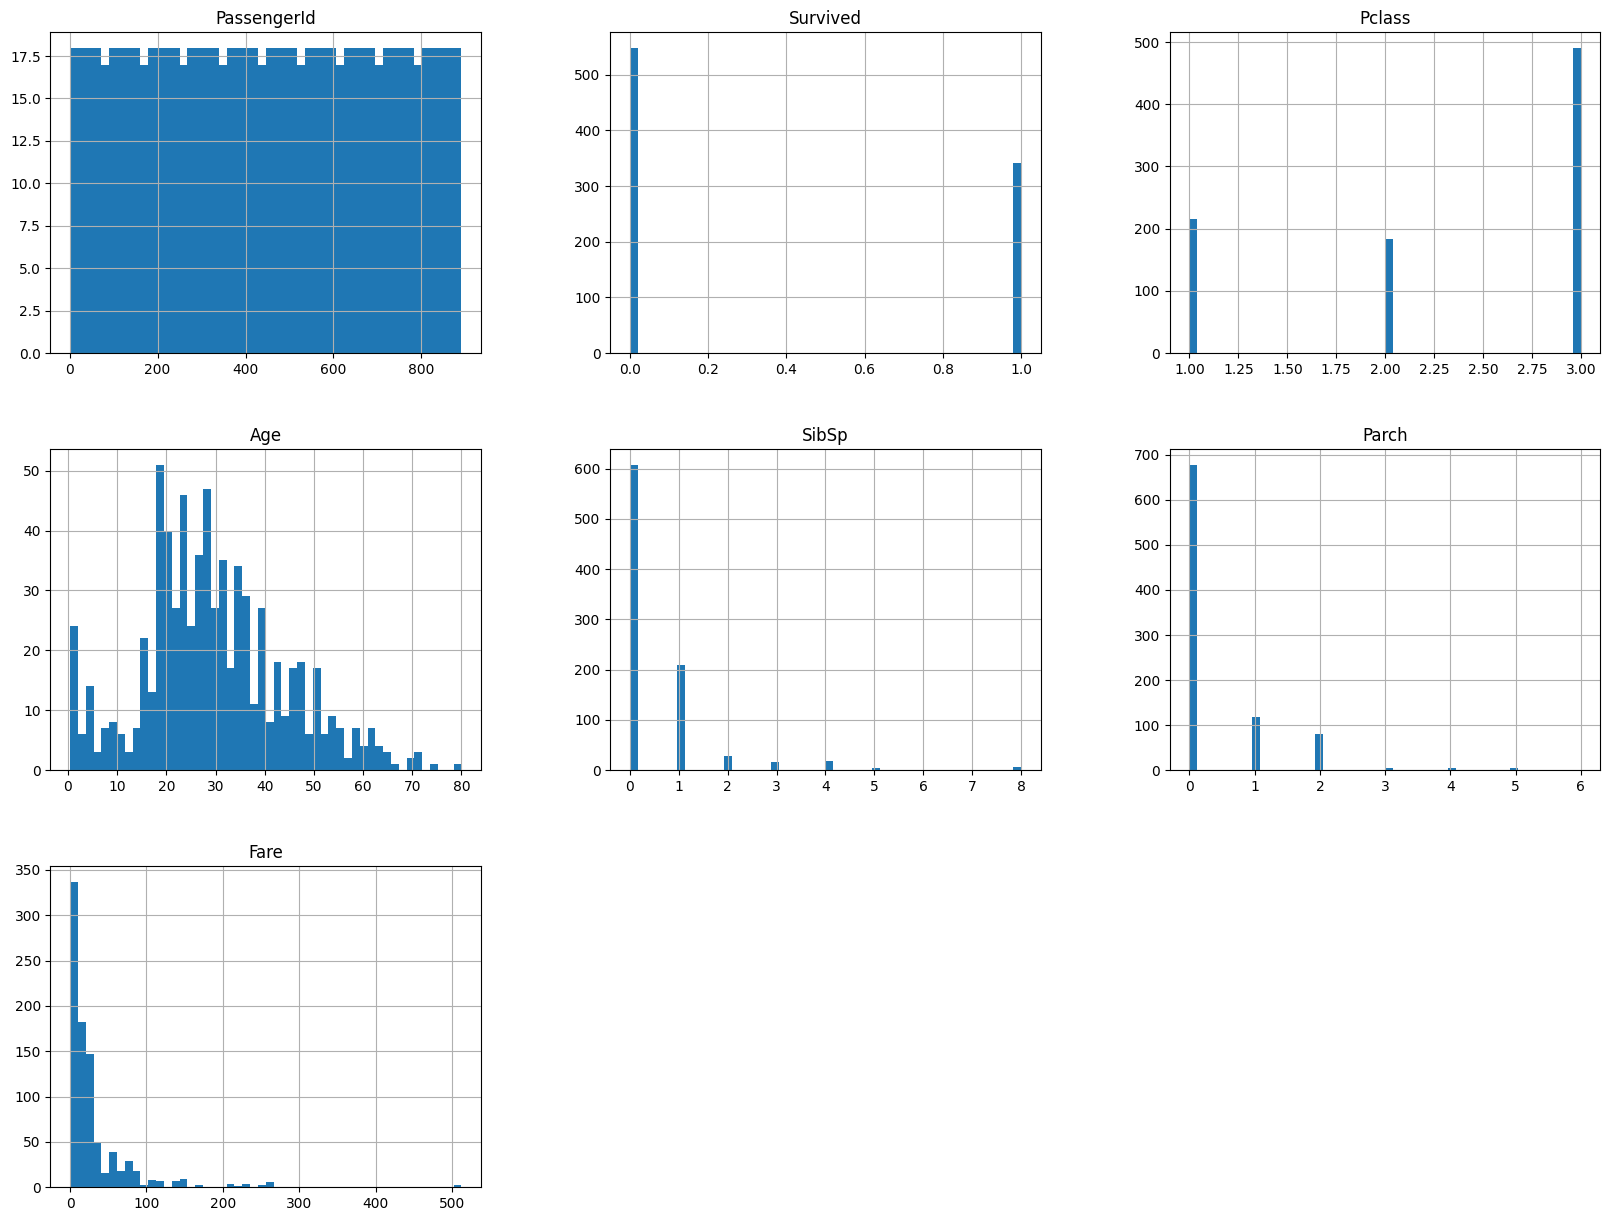

In [71]:
df.hist(bins=50, figsize=(20,15));

Como previsto, mesmo estando em classe alta, há um outlier que gostariamos de apagar


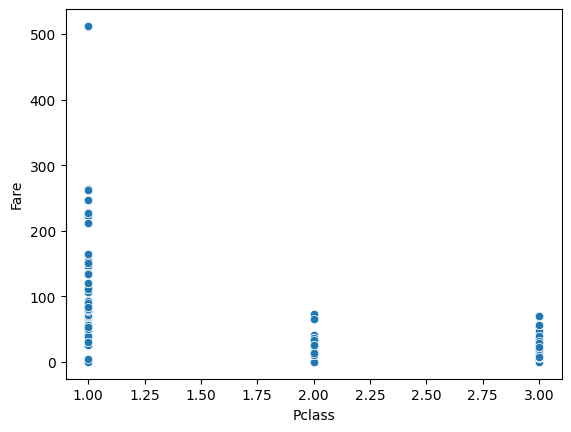

In [72]:
sns.scatterplot(df, x="Pclass", y="Fare");

- Eliminação (Apagar o registro/coluna)
- Substituição (Constante, média, mediana ou a moda da coluna)

Esses dois registros de 512 Dólares podem ser problema, para não ter que tirar o registro inteiro, 
vamos substituir pela média dos tickets mais caros abaixo dos 512 

In [73]:
median = df.loc[(df['Fare'] > 200) & (df['Fare'] < 300), "Fare"].median() # Pegamos a mediana das tarifas
df.loc[(df['Fare'] > 500), "Fare"] = median

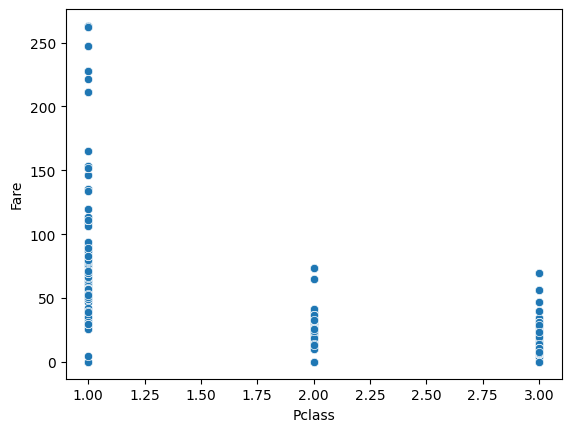

In [74]:
sns.scatterplot(df, x="Pclass", y="Fare"); # Melhor!

Só pra morrer de certeza que não tem valores fora de (0,1)

In [75]:
df.loc[(df['Survived'] < 1) & (df['Survived'] > 0)] # Nada, tudo ok 0,75

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [76]:
df['Sex'].value_counts() # Ok, sem erros

Sex
male      577
female    314
Name: count, dtype: int64

In [77]:
df['Embarked'].value_counts() # Maravilha, há uma ausência de incorretudes

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Teste de hipóteses

Podemos tirar um tempo para testar algumas hipotéses de maneira visual, o que é muito importante não só pra aprender mais sobre os dados, mas também para que depois de treinado o nosso modelo, podemos entender se ele seguiu a lógica que encontramos antes do treinamento. 

Ou seja, é tão importante para fazermos um bom modelo, quanto para validá-lo. 

Caso você tivesse filhos ou estivesse com seus pais, as chances de sobreviver são ainda menores de caso você estivesse sozinho (plot à direita), coincidentemente, você também teria menos chances de sobreviver caso estivesse com um irmão ou cônjuge (plot à esquerda).

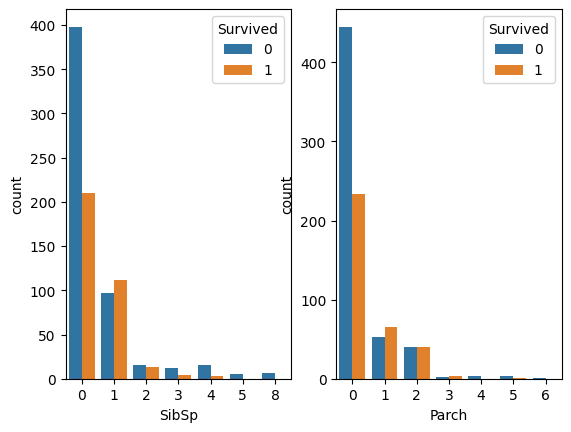

In [78]:
fig, axis = plt.subplots(ncols=2)

sns.countplot(df, x="SibSp", hue="Survived", ax=axis[0]);
sns.countplot(df, x="Parch", hue="Survived", ax=axis[1]);

Temos uma maior quantidade de pessoas que morreram do que sobreviveram (500+ para ~330) 


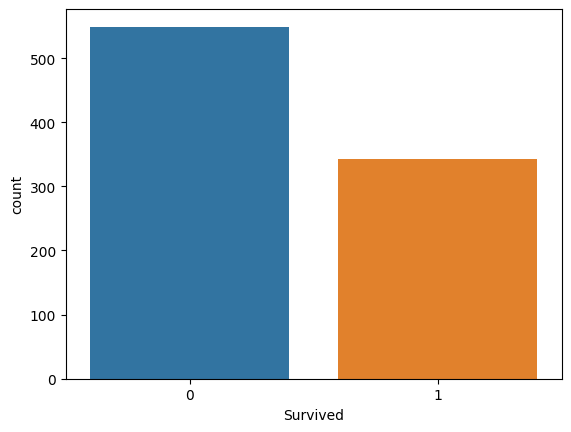

In [79]:
sns.countplot(df, x="Survived");

Das classes, a que mais sobreviveram foram os de Classe A e os de Classe C

Contudo, por serem em maior número (e possivelmente com menor prioridade), a Classe C foi a que teve maior número de mortes

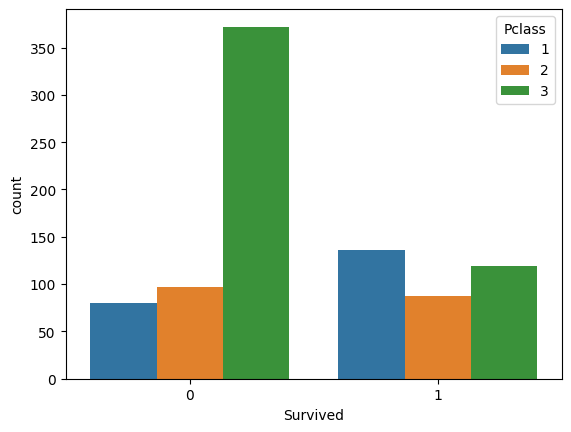

In [80]:
sns.countplot(df, x="Survived", hue="Pclass");

Mulheres foram as que mais sobreviveram, em comparação, os Homens tiveram mais mortes. 
(Espero que nenhum deles sejam por falta de espaço numa porta-salva-vidas)

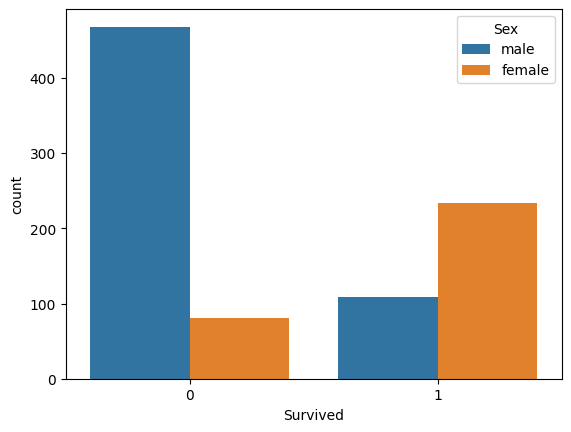

In [81]:
sns.countplot(df, x="Survived", hue="Sex");

-> Mapa do Navio (àreas de perigo e de facil acesso aos botes)
-> Relação de Cabines com maior probabilidade de sobrevivência

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Dropar a coluna de cabin, que possui muitos NAs e não tem tanta significância sozinho
- Dropar a coluna de Id e de nome já que não tem tanto uso para nós
- Dropar a coluna de nome, já que não entra como atributo categórico 
- Dropar a coluna de ticket, já que não tem muito o que tirar dele

In [83]:
df.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"], inplace=True)

Esses serão os atributos que vamos usar no treinamento do modelo

### Exercício!

Fazer uma correlação entre SibSp e Parch, e depois entre survived. (Sabemos que os dois atributos tem correlação entre si, mas eles tem com o atributo-alvo?)

In [84]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Tratamento dos dados para serem inputados no modelo

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separação dos atributos preditores e do alvo de predição
X = df[[x for x in df.columns.tolist() if x != "Survived"]]
y = df['Survived'].copy()

# Colunas numéricas
numerics = ['Age', 'Fare', "Parch", "SibSp"]

# Colunas de Categóricas
categories = [att for att in X.columns.tolist() if att not in numerics]

# Pipeline de tratamento dos dados numéricos
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')), # Se tiver N/A, coloca um valor
    ("normalize", StandardScaler()) # 1, 3, 7, 45
])

df_num = X[numerics]
num_pipeline.fit_transform(df_num)

# Pipeline de tratamento de dados categoricos e agregação de colunas
full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerics),
    ("one_hot", OneHotEncoder(sparse_output=False), categories), # 
])

X_treated = full_pipeline.fit_transform(X)

In [87]:
X_treated

array([[-0.56573646, -0.56276156, -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.66386103,  0.93901266, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.54693077, -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 , -0.18282265,  2.00893337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.02920537, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.55103505, -0.47367361, ...,  1.        ,
         0.        ,  0.        ]])

In [86]:
## TODO: Fazer o resto do projeto e criar um modelo com os nossos dados, e fazer as métricas de qualidade do modelo